In [39]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

In [40]:
import plotly.graph_objects as go
import plotly.express as px

In [41]:
df = pd.read_csv('/home/aum/Downloads/adult.csv')

In [42]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [44]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [45]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [46]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [47]:
# change salary less than 50k as 0 and more than 50k as 1
df.salary = df.salary.replace({' <=50K':1,' >50K':0})

In [48]:
df.age.values

array([39, 50, 38, ..., 58, 22, 52])

In [49]:
df.age.unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

In [50]:
# age is grouped into several category for EDA
age_30_0 = 0               # people under age 30 paid below 50k
age_30_1 = 0               # people under age 30 paid above 50k
age_50_0 = 0               # people between 30 and 50 paid below 50k
age_50_1 = 0               # people between 30 and 50 paid above 50k
age_70_0 = 0               # people between 50 and 70 paid below 50k
age_70_1 = 0               # people between 50 and 70 paid above 50k
age_90_0 = 0               # people above 70 paid below 50k
age_90_1 = 0               # people above 70 paid above 50k
for i in df.age:
    if i<=30:
        if df.salary.iloc[i] ==0:
            age_30_0+=1
        else:
            age_30_1+=1
    elif i>30 and i<=50:
        if df.salary.iloc[i] ==0:
            age_50_0+=1
        else:
            age_50_1+=1
    elif i>50 and i<=70:
        if df.salary.iloc[i] ==0:
            age_70_0+=1
        else:
            age_70_1+=1
    else:
        if df.salary.iloc[i] ==0:
            age_90_0+=1
        else:
            age_90_1+=1

In [51]:
# percentage conversion
age_30_0 = (age_30_0*100)/(age_30_0+age_30_1)              # people under age 30 paid below 50k
age_30_1 = 100-age_30_0                                   # people under age 30 paid above 50k
age_50_0 = (age_50_0*100)/(age_50_0+age_50_1)               # people between 30 and 50 paid below 50k
age_50_1 = 100-age_50_0                                    # people between 30 and 50 paid above 50k
age_70_0 = (age_70_0*100)/(age_70_0+age_70_1)               # people between 50 and 70 paid below 50k
age_70_1 = 100-age_70_0                                    # people between 50 and 70 paid above 50k
age_90_0 = (age_90_0*100)/(age_90_0+age_90_1)              # people above 70 paid below 50k
age_90_1 = 100-age_90_0                                    # people above 70 paid above 50k 


In [52]:
data = {
    '<=50k':[age_30_0,age_50_0,age_70_0,age_90_0],
    '>50k' :[age_30_1,age_50_1,age_70_1,age_90_1]
}
age_sal = pd.DataFrame(data=data,index=['age_30','age_50','age_70','age_90'])
age_sal

,<=50k,>50k
age_30,29.710556,70.289444
age_50,10.052160,89.947840
age_70,31.452703,68.547297
age_90,14.444444,85.555556


In [53]:
index = ['age_30','age_50','age_70','age_90']

fig = go.Figure(data=[
    go.Bar(name='below 50k', x=index, y=age_sal['<=50k']),
    go.Bar(name='above 50k', x=index, y=age_sal['>50k'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

From the above graph it can be intrepreted as

                            1)many people between the age group 50-70 are low paid
                            2)many people under the age group 30 are low paid
                            3)many people between the age group 30-50 are paid above 50k

In [54]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [55]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [56]:
df.workclass = df.workclass.replace({' ?':'others'})             # replace the missing columns as others

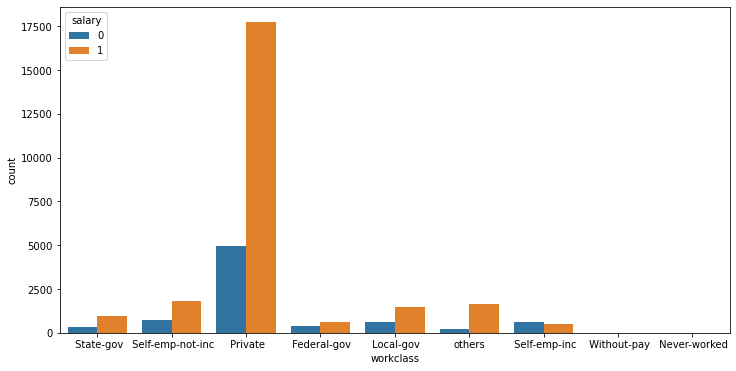

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(x=df.workclass,hue=df.salary)
plt.show()

The above graph can be interpreted as

                        1)Many people of Self-emp-inc category are low paid
                        2)Many private employees are getting paid above 50k

In [58]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [59]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [60]:
df.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [61]:
# grouping the education column
df.education = df.education.replace({' 11th':'under_12th',' 10th':'under_12th',' 5th-6th':'under_12th',' 1st-4th':'under_12th'
                                    ,' Preschool':'under_12th',' 7th-8th':'under_12th',' 9th':'under_12th',' 12th':'under_12th'
                                    })


In [62]:
df.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
under_12th        4253
 Masters          1723
 Assoc-voc        1382
 Assoc-acdm       1067
 Prof-school       576
 Doctorate         413
Name: education, dtype: int64

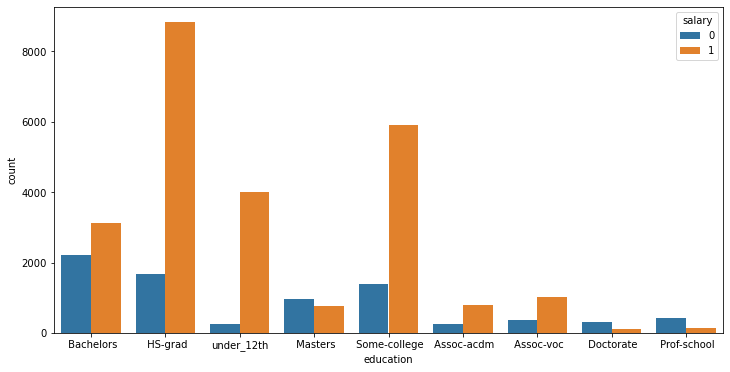

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(x=df.education, hue=df.salary)
plt.show()

The following graph can be interpreted as

                        1)HS-grad were paid more than other classes
                        2)Doctorate were paid less than other classes
                        3)Many Prof-school were paid less than 50k
                        4)The salary of individual decreases with higher education
                        

In [64]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [65]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

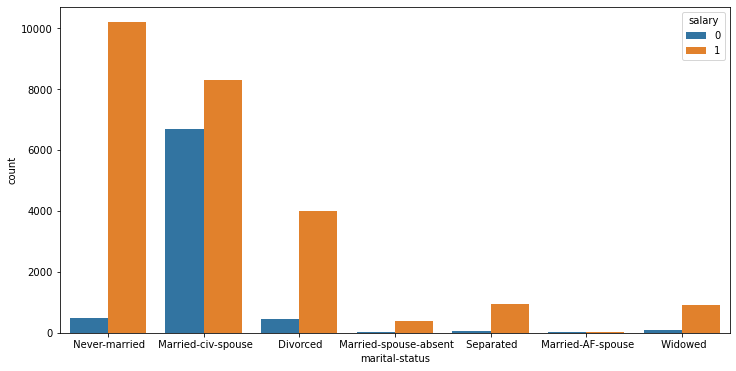

In [66]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['marital-status'],hue=df['salary'])
plt.show()

The above graph can be intrepreted as

                      1) People in Never-married category are getting higher pay comparing others
                      2) People from Married-civ-spouse category are falling equally in both salary categories

In [67]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [68]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [69]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [70]:
# replacing missing values
df.occupation = df.occupation.replace({' ?':' Other-service'})
# replace values with small counts
df.occupation = df.occupation.replace({' Armed-Forces':' Other-service',' Priv-house-serv':' Other-service'})

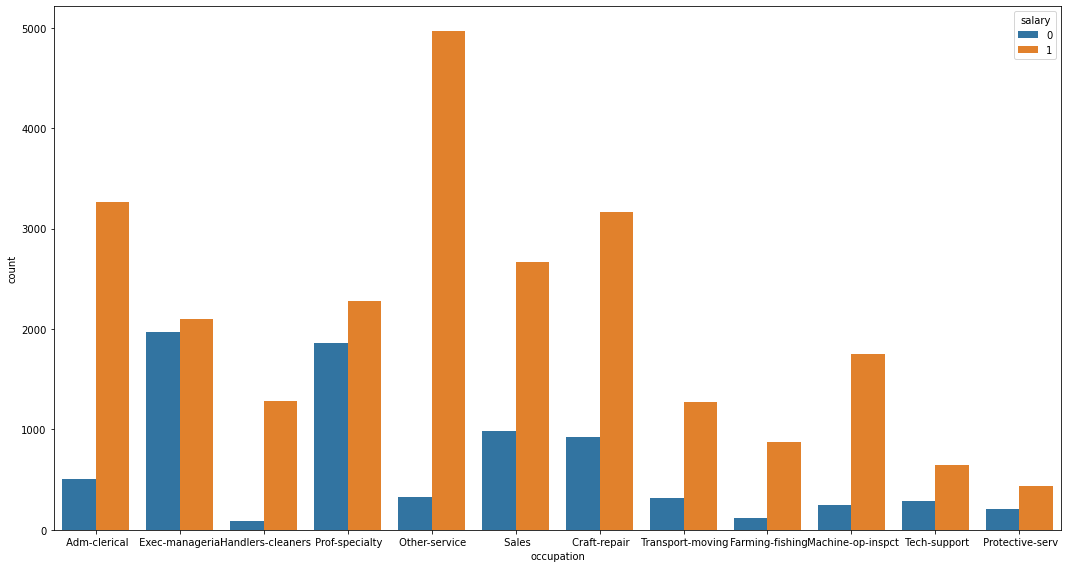

In [74]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['occupation'], hue=df['salary'])
plt.tight_layout()
plt.show()

The above graph can be interpreted as 
                        1)Many of Exec-manager getiing paid less than 50k
                        2)Many of Prof-specialty getting paid less than 50k
                        3)People in Other-services group are mostly paid more than 50k

In [75]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')